<a href="https://colab.research.google.com/github/bskarthik05/Task_2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
try:
    df = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found. Please upload the file or check the path.")

In [35]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [36]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
print("Summary Statistics for Numerical Features:")
print(df.describe())

Summary Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [38]:
print("Summary Statistics for Categorical Features:")
print(df.describe(include=['object', 'category']))

Summary Statistics for Categorical Features:
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


In [39]:
print("Checking for Missing Values:")
print(df.isnull().sum())

Checking for Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [40]:
df_vis = df.copy()

In [41]:
median_age = df_vis['Age'].median()
df_vis['Age'].fillna(median_age, inplace=True)
print(f"Filled missing 'Age' values with median: {median_age}")

Filled missing 'Age' values with median: 28.0


<ipython-input-41-e89ad575ce11>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [42]:
mode_embarked = df_vis['Embarked'].mode()[0]
df_vis['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Filled missing 'Embarked' values with mode: {mode_embarked}")

Filled missing 'Embarked' values with mode: S


<ipython-input-42-3f5e7a1eff35>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
df_vis['HasCabin'] = df_vis['Cabin'].notnull().astype(int)
print("Created 'HasCabin' feature.")

Created 'HasCabin' feature.


In [44]:
print("Missing Values after basic imputation (for visualization copy):")
print(df_vis.isnull().sum())

Missing Values after basic imputation (for visualization copy):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


In [45]:
print("--- Visualizations: Histograms and Boxplots ---")

--- Visualizations: Histograms and Boxplots ---


In [46]:
numeric_features_dist = ['Age', 'Fare', 'SibSp', 'Parch']

Generating Histograms...


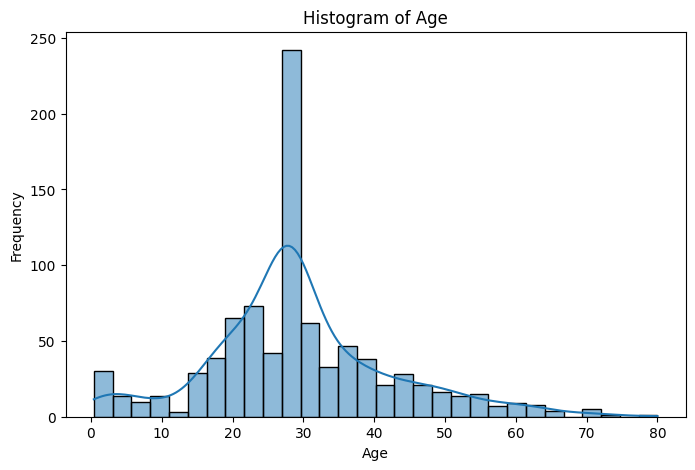

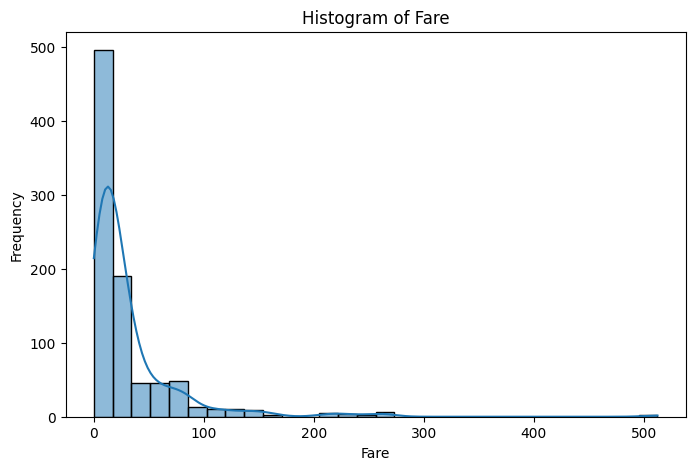

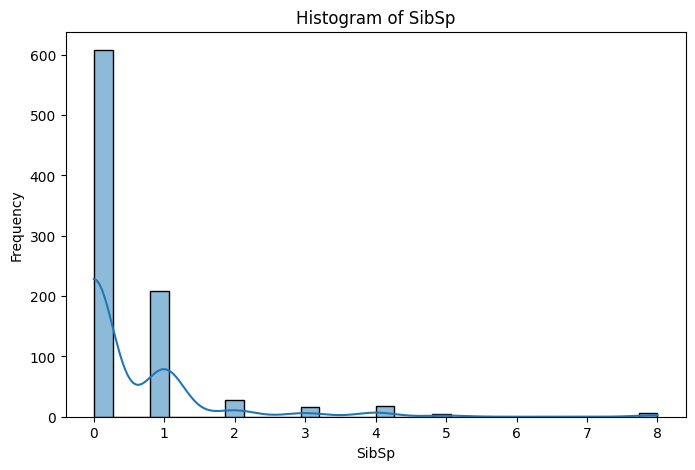

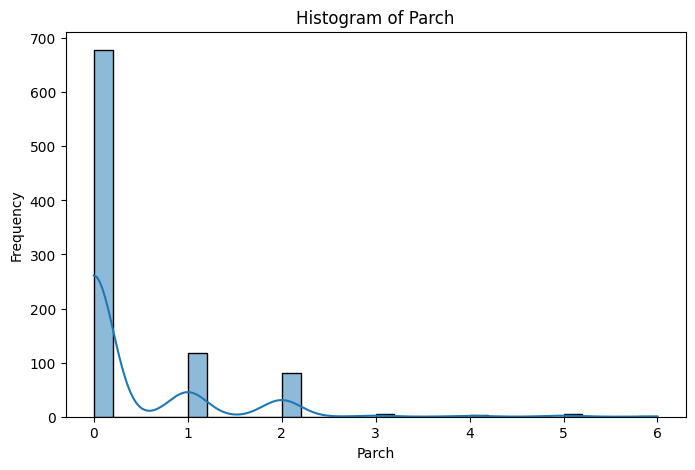

In [47]:
print("Generating Histograms...")
for col in numeric_features_dist:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_vis[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Generating Boxplots...


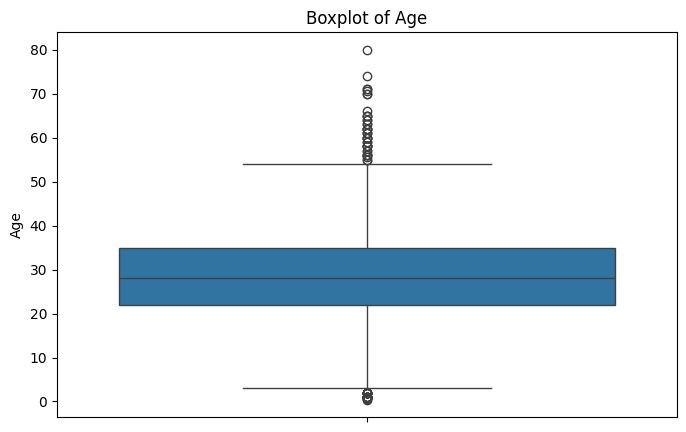

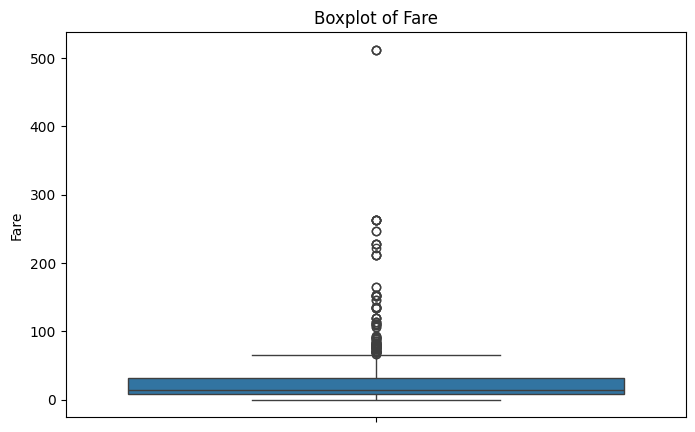

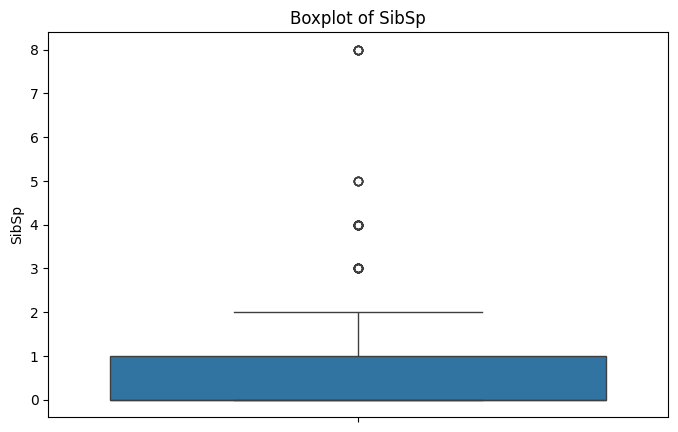

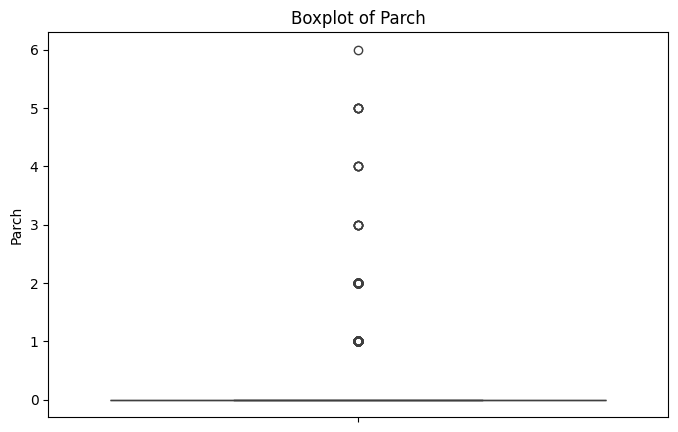

In [48]:
print("Generating Boxplots...")
for col in numeric_features_dist:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_vis[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Generating Boxplots of Numeric Features by 'Survived'...


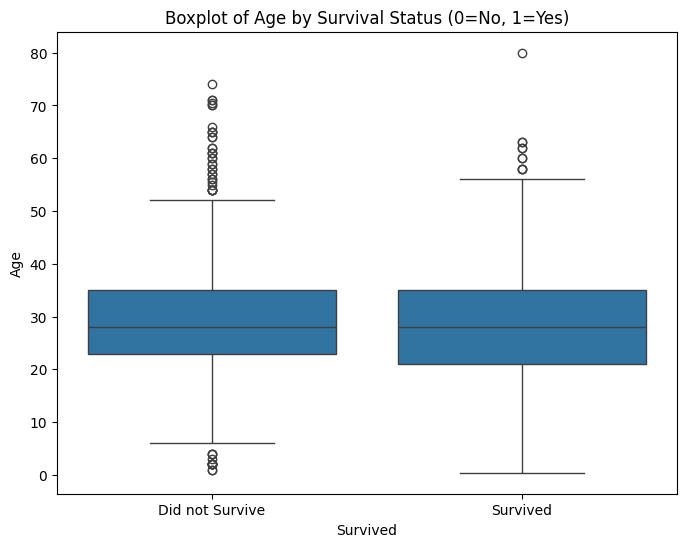

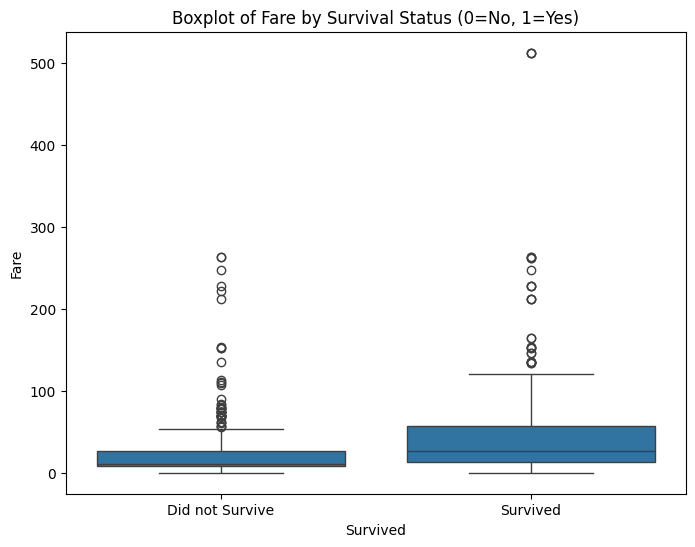

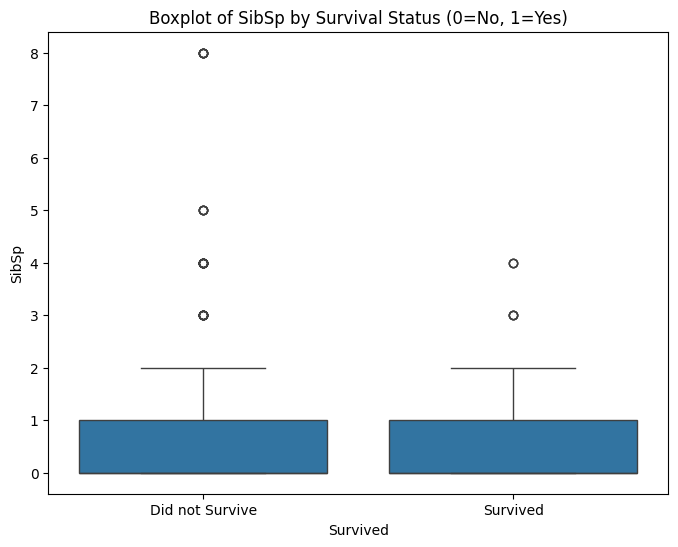

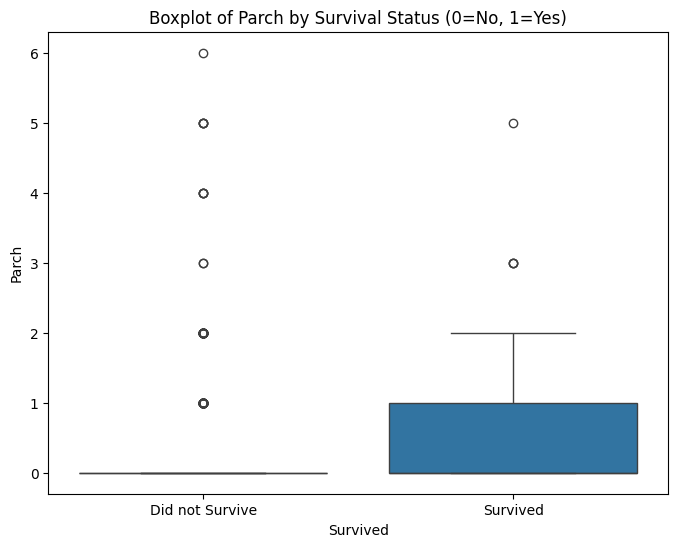

In [49]:
print("Generating Boxplots of Numeric Features by 'Survived'...")
for col in numeric_features_dist:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y=col, data=df_vis)
    plt.title(f'Boxplot of {col} by Survival Status (0=No, 1=Yes)')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Did not Survive', 'Survived'])
    plt.show()


In [50]:
print("Generating Interactive Boxplot of Age by Pclass (using Plotly)...")
fig_plotly_boxplot = px.box(df_vis, x='Pclass', y='Age', color='Survived',
                            title='Interactive Boxplot of Age by Pclass and Survival Status',
                            labels={'Pclass':'Passenger Class', 'Age':'Age (years)', 'Survived':'Survival Status'},
                            notched=True)
fig_plotly_boxplot.show()

Generating Interactive Boxplot of Age by Pclass (using Plotly)...


In [51]:
print("--- Visualizations: Feature Relationships ---")

--- Visualizations: Feature Relationships ---


In [52]:
numeric_cols_for_corr = df_vis.select_dtypes(include=np.number).columns.tolist()
if 'PassengerId' in numeric_cols_for_corr:
    numeric_cols_for_corr.remove('PassengerId')

In [53]:
correlation_matrix = df_vis[numeric_cols_for_corr].corr()

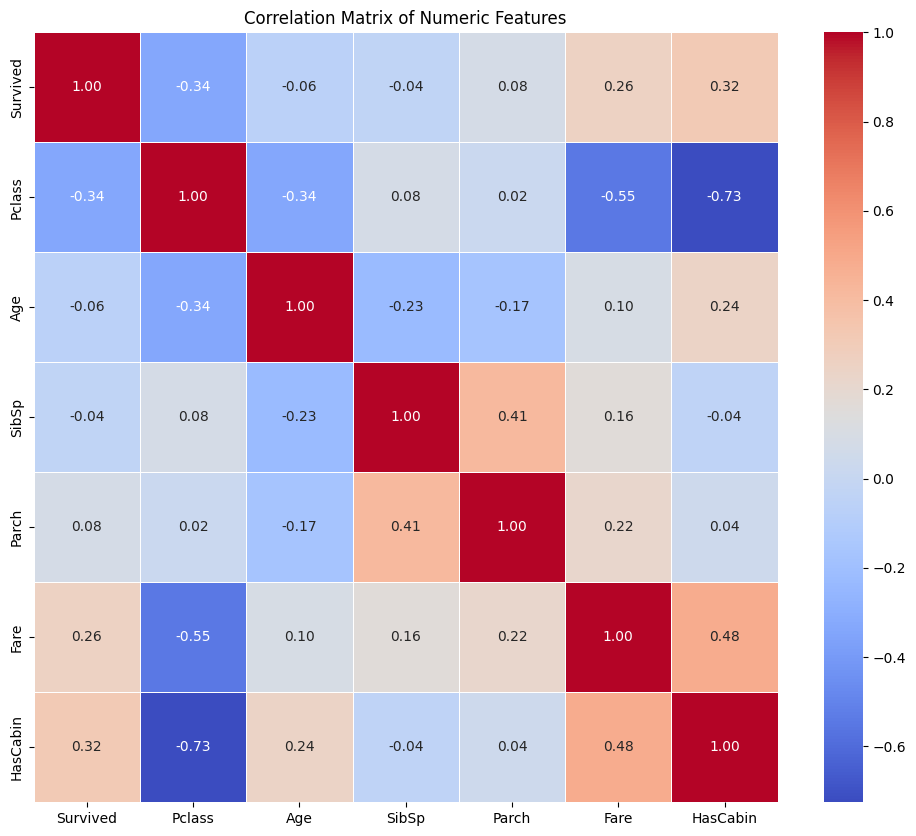

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [55]:
print("Generating Pairplot (can take a moment)...")
df_vis_pairplot = df_vis.copy()
df_vis_pairplot['Survived'] = df_vis_pairplot['Survived'].astype('category')
df_vis_pairplot['Pclass'] = df_vis_pairplot['Pclass'].astype('category')

Generating Pairplot (can take a moment)...


In [56]:
df_vis_pairplot['Sex_numeric'] = df_vis_pairplot['Sex'].map({'male': 0, 'female': 1})

In [57]:
pairplot_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex_numeric', 'Survived']

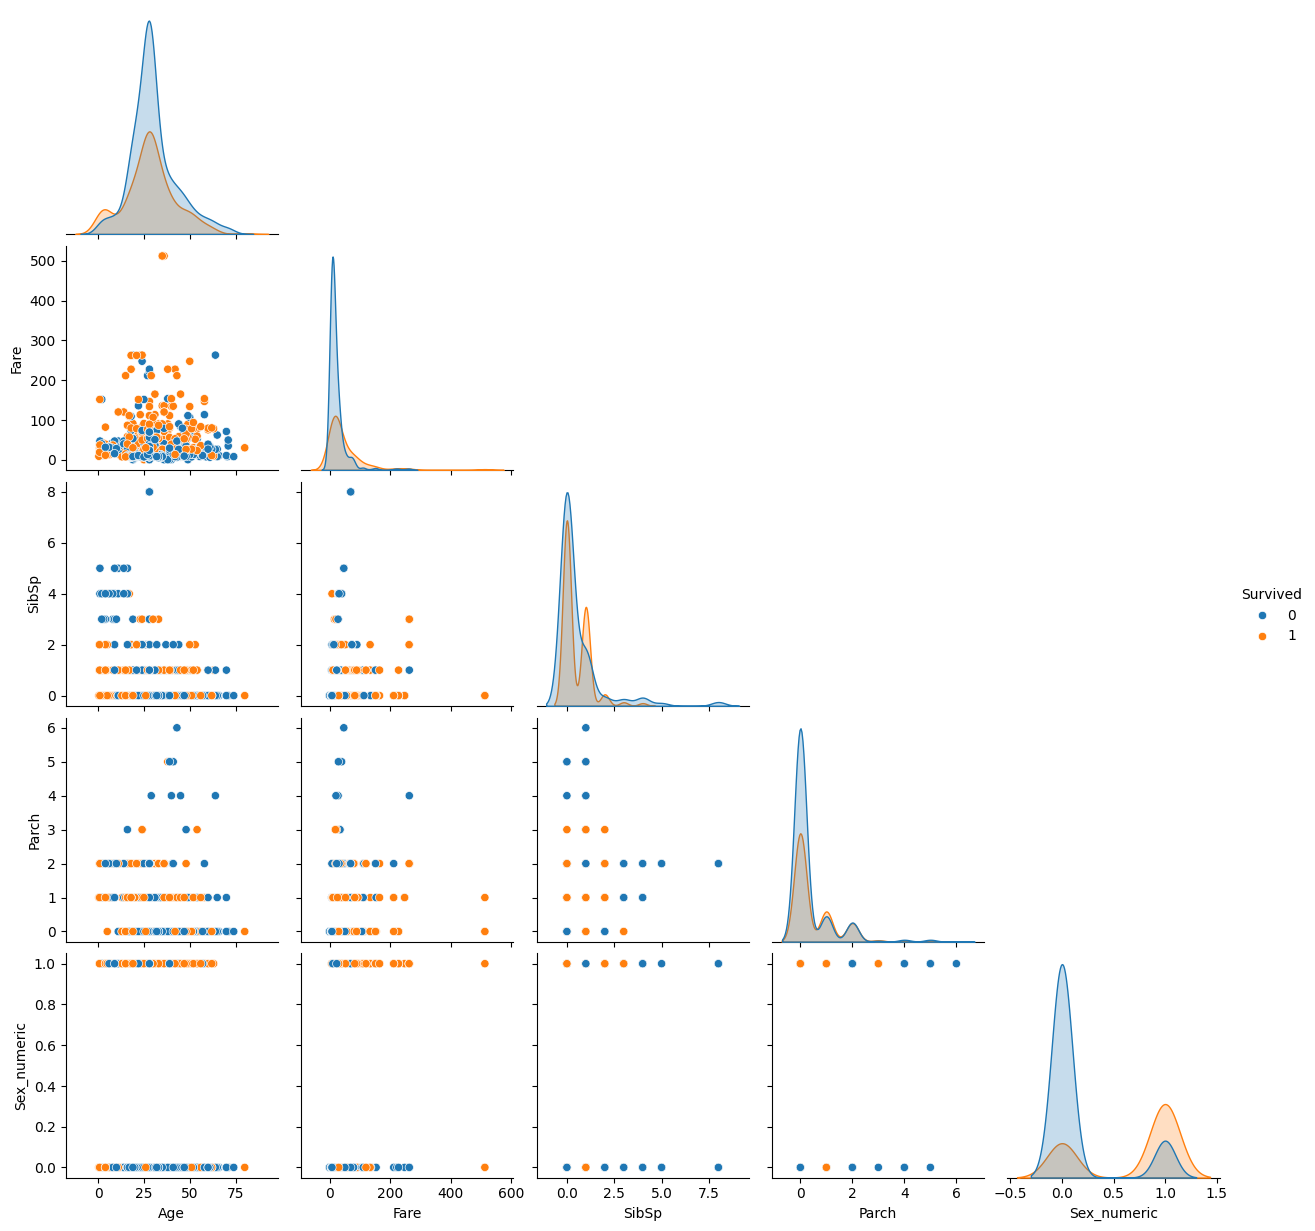

In [58]:
sns.pairplot(df_vis_pairplot[pairplot_features], hue='Survived', diag_kind='kde', corner=True)

In [59]:
plt.suptitle('Pairplot of Selected Features by Survival Status', y=1.02)
plt.show()

<Figure size 640x480 with 0 Axes>